In [1]:
import torch
from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable
import framework
import matplotlib.pyplot as plt

### Test of computation of loss

In [6]:
loss_error = []
for n in range(100):
    y_output = torch.randn((5,2))
    y_target = torch.randn((5,2))
    loss_module = framework.LossMSE(y_target)
    our_loss = loss_module.forward(y_output)
    loss_mod_torch = nn.MSELoss()
    pytorch_loss = loss_mod_torch(y_output, y_target)
    loss_error.append(abs(our_loss.item() - pytorch_loss.item()))

In [8]:
torch.Tensor(loss_error).mean()

tensor(8.7619e-08)

### Test of forward pass

In [10]:
H = 25
hidden_nb = 1
modules_array = []

# Input layer
modules_array.append(framework.Linear(2, H, 'relu'))
# Hidden layers
for i in range(0, hidden_nb):
    modules_array.append(framework.ReLU())
    modules_array.append(framework.Linear(H, H, 'relu'))
# Output layer
modules_array.append(framework.ReLU())
modules_array.append(framework.Linear(H, 2, 'none'))

model = framework.Sequential(modules_array)

In [11]:
w0 = model.param()[0][0][0]
b0 = model.param()[0][1][0]
w1 = model.param()[2][0][0]
b1 = model.param()[2][1][0]
w2 = model.param()[4][0][0]
b2 = model.param()[4][1][0]

In [12]:
input_set = torch.randn(100,2)
output = model.forward(input_set)

In [13]:
output

tensor([[-1.7836e-01,  5.2251e-02],
        [ 1.0734e-02, -3.6115e-02],
        [ 5.1585e-01,  1.0165e-01],
        [-3.7734e-02,  6.4549e-02],
        [ 1.1146e+00, -7.2557e-02],
        [-7.4668e-02,  2.8631e-03],
        [ 5.4416e-01,  2.6930e-01],
        [ 3.0362e-01, -1.8449e-02],
        [ 5.3007e-01,  3.0853e-01],
        [ 8.2506e-01,  5.8055e-01],
        [-2.0837e-01,  6.2948e-02],
        [ 1.4248e+00,  7.3748e-01],
        [ 2.1688e-01,  1.1998e-01],
        [ 4.5663e-01,  2.3180e-01],
        [ 3.1076e-01,  2.1699e-01],
        [ 3.7736e-01,  4.9637e-02],
        [ 8.1878e-01,  1.0429e-01],
        [ 3.2469e-01,  2.2102e-01],
        [ 1.4784e-01,  2.0133e-02],
        [ 3.8448e-01,  7.3769e-02],
        [ 1.6008e-01,  1.0160e-01],
        [ 5.6278e-01,  2.3536e-01],
        [ 2.5034e-01,  2.8058e-03],
        [ 6.3103e-01,  8.5099e-02],
        [ 4.7210e-01, -2.9611e-02],
        [-4.3422e-03, -5.2129e-02],
        [ 1.7059e-01,  6.6104e-03],
        [ 4.9986e-01,  2.047

In [14]:
torch_model = nn.Sequential(
      nn.Linear(2, H, bias=True),
      nn.ReLU(),
      nn.Linear(H, H, bias=True),
      nn.ReLU(),
      nn.Linear(H, 2),
      )

In [15]:
torch_model[0].weight.data = w0
torch_model[0].bias.data = b0
torch_model[2].weight.data = w1
torch_model[2].bias.data = b1
torch_model[4].weight.data = w2
torch_model[4].bias.data = b2

In [16]:
output_torch = torch_model(input_set)

In [17]:
(output_torch - output).norm()

tensor(0.)

### Test of backpropagation

In [18]:
input_set = Variable(torch.randn(100,2))
target = Variable(torch.randn(100,1))

In [19]:
H = 25
hidden_nb = 1
modules_array = []

# Input layer
modules_array.append(framework.Linear(2, H, 'relu'))
# Hidden layers
for i in range(0, hidden_nb):
    modules_array.append(framework.ReLU())
    modules_array.append(framework.Linear(H, H, 'relu'))
# Output layer
modules_array.append(framework.ReLU())
modules_array.append(framework.Linear(H, 1, 'none'))

model = framework.Sequential(modules_array)

In [20]:
w0 = model.param()[0][0][0]
b0 = model.param()[0][1][0]
w1 = model.param()[2][0][0]
b1 = model.param()[2][1][0]
w2 = model.param()[4][0][0]
b2 = model.param()[4][1][0]

In [21]:
torch_model = nn.Sequential(
      nn.Linear(2, H, bias=True),
      nn.ReLU(),
      nn.Linear(H, H, bias=True),
      nn.ReLU(),
      nn.Linear(H, 1),
      )

In [22]:
torch_model[0].weight.data = w0
torch_model[0].bias.data = b0
torch_model[2].weight.data = w1
torch_model[2].bias.data = b1
torch_model[4].weight.data = w2
torch_model[4].bias.data = b2

In [23]:
output = model.forward(input_set)
output_torch = torch_model(input_set)

In [24]:
(output_torch - output).norm()

tensor(0.)

In [25]:
loss_module = framework.LossMSE(target)
our_loss = loss_module.forward(output)
loss_mod_torch = nn.MSELoss()
pytorch_loss = Variable(loss_mod_torch(output_torch,target), requires_grad=True)

In [26]:
pytorch_loss, our_loss

(tensor(1.0360, requires_grad=True), tensor(1.0360))

In [27]:
grad = model.backward(loss_module.backward())
grad_torch = model.backward(loss_module.backward())

In [28]:
(grad - grad_torch).norm()

tensor(0.)

### Test on an example 

In [31]:
import math

In [29]:
def generate_disc_set(nb):
    # generate unif samples
    p = torch.FloatTensor(nb, 2).uniform_(0, 1)
    # assign label inside/outside circle
    center = torch.tensor([0.5,0.5]).float()
    inside = ( torch.norm(p-center, dim=1) < (1.0 / math.sqrt(2*math.pi)) )
    # Hot encoding
    label = torch.zeros(inside.shape[0], 2)
    label[inside==1,1] = 1
    label[inside==0,0] = 1
    return p, label

In [88]:
N = 1000
x_train, y_train = generate_disc_set(N)
x_test, y_test = generate_disc_set(N)

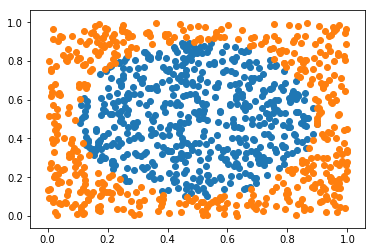

In [89]:
plt.scatter(x_train[y_train[:,1] ==1][:,0], x_train[y_train[:,1] ==1][:,1])
plt.scatter(x_train[y_train[:,0] ==1][:,0], x_train[y_train[:,0] ==1][:,1])
plt.figure(figsize=(5,5), dpi=80)

In [109]:
H = 25 # hidden layer size
hidden_nb = 3 # hidden layer amount
modules_array = []

# Input layer
modules_array.append(framework.Linear(2, H, 'relu'))
# Hidden layers
for i in range(0, hidden_nb):
    modules_array.append(framework.ReLU())
    modules_array.append(framework.Linear(H, H, 'relu'))
# Output layer
modules_array.append(framework.ReLU())
modules_array.append(framework.Linear(H, 2, 'none'))

model = framework.Sequential(modules_array)

In [110]:
def compute_error_percent(prediction, target) :
    errors = (prediction.argmax(dim=1) != target.argmax(dim=1))
    return (100 * errors.sum() / target.shape[0]).item()

In [111]:
def compute_test_error(model, test_input, test_target) :
    # Forward pass
    output = model.forward(test_input)
    # Compute error %
    return compute_error_percent(output, test_target)

In [112]:
def train(model, x_train, y_train) :
    mini_batch_size = 200
    epochs = 500
    lr = 1e-2
    train_loss_hist = []
    train_error_hist = []
    test_error_hist = []
    optimizer = framework.SGD(model.param(), lr)
    for e in range(0, epochs):
        # variables to accumulate loss and error over the batches of this epoch
        train_loss_buffer = 0
        train_error_buffer = 0
        for b in range(0, x_train.size(0), mini_batch_size):
                # Forward pass of neural net
                x_batch = x_train.narrow(0, b, mini_batch_size)
                y_batch = y_train.narrow(0, b, mini_batch_size)
                output = model.forward(x_batch)
                # Compute loss
                loss_module = framework.LossMSE(y_batch)
                loss = loss_module.forward(output)
                train_loss_buffer += loss.item()
                # Compute train error
                train_error_buffer += compute_error_percent(output,y_batch)
                # Set all gradients to zero
                optimizer.zero_grad()
                # Backward
                model.backward(loss_module.backward())
                # Step
                optimizer.step()
        # Store average loss & error for this epoch
        batch_per_epoch = x_train.size(0) / mini_batch_size
        train_loss_hist.append(train_loss_buffer / batch_per_epoch)
        train_error_hist.append(train_error_buffer / batch_per_epoch)
        # Compute a test error
        test_error_hist.append(compute_test_error(model, x_test, y_test))
    return train_loss_hist, train_error_hist, test_error_hist

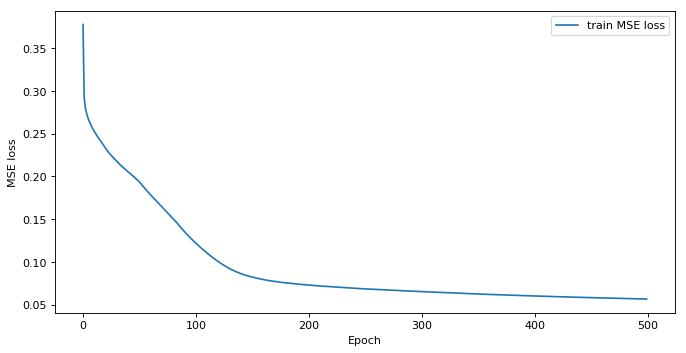

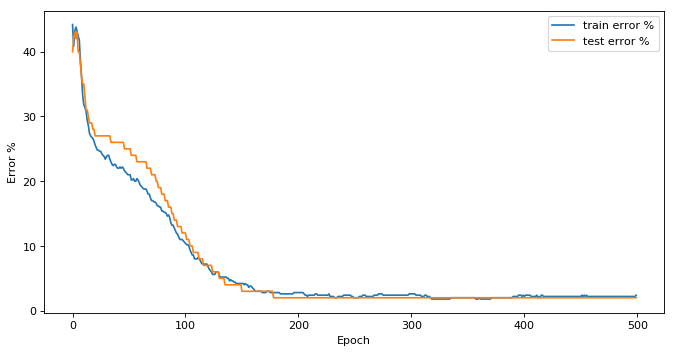

In [113]:
train_loss_hist, train_error_hist, test_error_hist = train(model, x_train, y_train)

plt.figure(figsize=(10,5), dpi=80)
plt.plot(train_loss_hist,label='train MSE loss')
plt.ylabel('MSE loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.figure(figsize=(10,5), dpi=80)
plt.plot(train_error_hist,label='train error %')
plt.plot(test_error_hist, label='test error %')
plt.ylabel('Error %')
plt.xlabel('Epoch')
plt.legend()
plt.show()